# Model Evaluation


## importing all dependencies


In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Getting all files

In [1]:
#getting list of dataset
import os

data_dir = '../data/'  
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

In [2]:
csv_files

['df_outlier_removed_from_medv.csv',
 'highly_moderate_correlated.csv',
 'hou_all.csv',
 'scaled_correlated.csv',
 'scaled_no_outlier.csv',
 'scaled_original.csv',
 'transformed_correlated.csv',
 'transformed_original.csv',
 'transformed_removed_outlier.csv']

## Model training and getting metrics

In [12]:
def perform_linear_regression(file_path):
    # Load dataset
    df = pd.read_csv(file_path, header=None)
    
    # Add column names
    col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'BIAS_COL']
    df.columns = col_names

     # Remove non-numeric columns and handle potential issues with headers
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    
    # Remove the last column
    df = df.iloc[:, :-1]

    # Replace infinite values with NaN and then drop them
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    
    # Split the data into features and target
    X = df.drop('MEDV', axis=1)
    y = df['MEDV']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10).mean()

    
    # Store results in a dictionary
    results = {
        'file': os.path.basename(file_path),
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'cross_val_score': cv_score
    }
    
    return results


In [14]:
# Process all CSV files and store results
results_list = []

for csv_file in csv_files:
    file_path = os.path.join(data_dir, csv_file)
    results = perform_linear_regression(file_path)
    results_list.append(results)

# Create DataFrame from results
results_df = pd.DataFrame(results_list)




In [15]:
results_df

,file,MAE,MSE,R2,cross_val_score
0,df_outlier_removed_from_medv.csv,2.831614,15.252727,0.608994,0.612255
1,highly_moderate_correlated.csv,3.007514,17.327400,0.664060,0.605730
2,hou_all.csv,3.189092,24.291119,0.668759,0.698664
3,scaled_correlated.csv,0.421641,0.340568,0.664060,0.605730
4,scaled_no_outlier.csv,0.406712,0.313948,0.608800,0.612445
5,scaled_original.csv,0.421641,0.340568,0.664060,0.605730
6,transformed_correlated.csv,0.332631,0.165751,0.574287,0.551333
7,transformed_original.csv,0.332631,0.165751,0.574287,0.551333
8,transformed_removed_outlier.csv,0.361536,0.208581,0.440209,0.571245


- **MAE**: Mean Absolute Error. Lower values indicate better performance.
- **MSE**: Mean Squared Error. Lower values indicate better performance.
- **R2**: R-squared, Higher values indicate better performance.
- **cross_val_score**: Higher values indicate better performance.

Here is the interpretation of each row:

1. **df_outlier_removed_from_medv.csv**:
   - MAE: 2.83, MSE: 15.25, R2: 0.61, Cross-validation score: 0.61
   - This dataset has moderate performance metrics with a decent R-squared value indicating that a moderate proportion of the variance is explained by the model.

2. **highly_moderate_correlated.csv**:
   - MAE: 3.01, MSE: 17.33, R2: 0.66, Cross-validation score: 0.61
   - Similar to the first dataset but with slightly higher error values.

3. **hou_all.csv**:
   - MAE: 3.19, MSE: 24.29, R2: 0.67, Cross-validation score: 0.70
   - Higher errors but slightly better cross-validation score, suggesting better generalization.

4. **scaled_correlated.csv**:
   - MAE: 0.42, MSE: 0.34, R2: 0.66, Cross-validation score: 0.61
   - Much lower error values, indicating better model performance.

5. **scaled_no_outlier.csv**:
   - MAE: 0.41, MSE: 0.31, R2: 0.61, Cross-validation score: 0.61
   - Best error values, suggesting the model performs very well with this dataset.

6. **scaled_original.csv**:
   - MAE: 0.42, MSE: 0.34, R2: 0.66, Cross-validation score: 0.61
   - Similar to `scaled_correlated.csv`.

7. **transformed_correlated.csv**:
   - MAE: 0.33, MSE: 0.17, R2: 0.57, Cross-validation score: 0.55
   - Low error values but slightly lower R2 and cross-validation scores.

8. **transformed_original.csv**:
   - MAE: 0.33, MSE: 0.17, R2: 0.57, Cross-validation score: 0.55
   - Identical to `transformed_correlated.csv`.

9. **transformed_removed_outlier.csv**:
   - MAE: 0.36, MSE: 0.21, R2: 0.44, Cross-validation score: 0.57
   - Slightly higher errors compared to other transformed datasets, and lower R2 value.

### Summary
- **Best Performing Dataset**: Based on MAE and MSE, the `scaled_no_outlier.csv` dataset seems to have the lowest errors.
- **Generalization**: `hou_all.csv` has the highest cross-validation score, suggesting it generalizes better than the others.
- **Overall Trend**: Scaled datasets seem to perform better in terms of error metrics compared to transformed datasets, despite some lower R2 values.

## Visualizing metrics

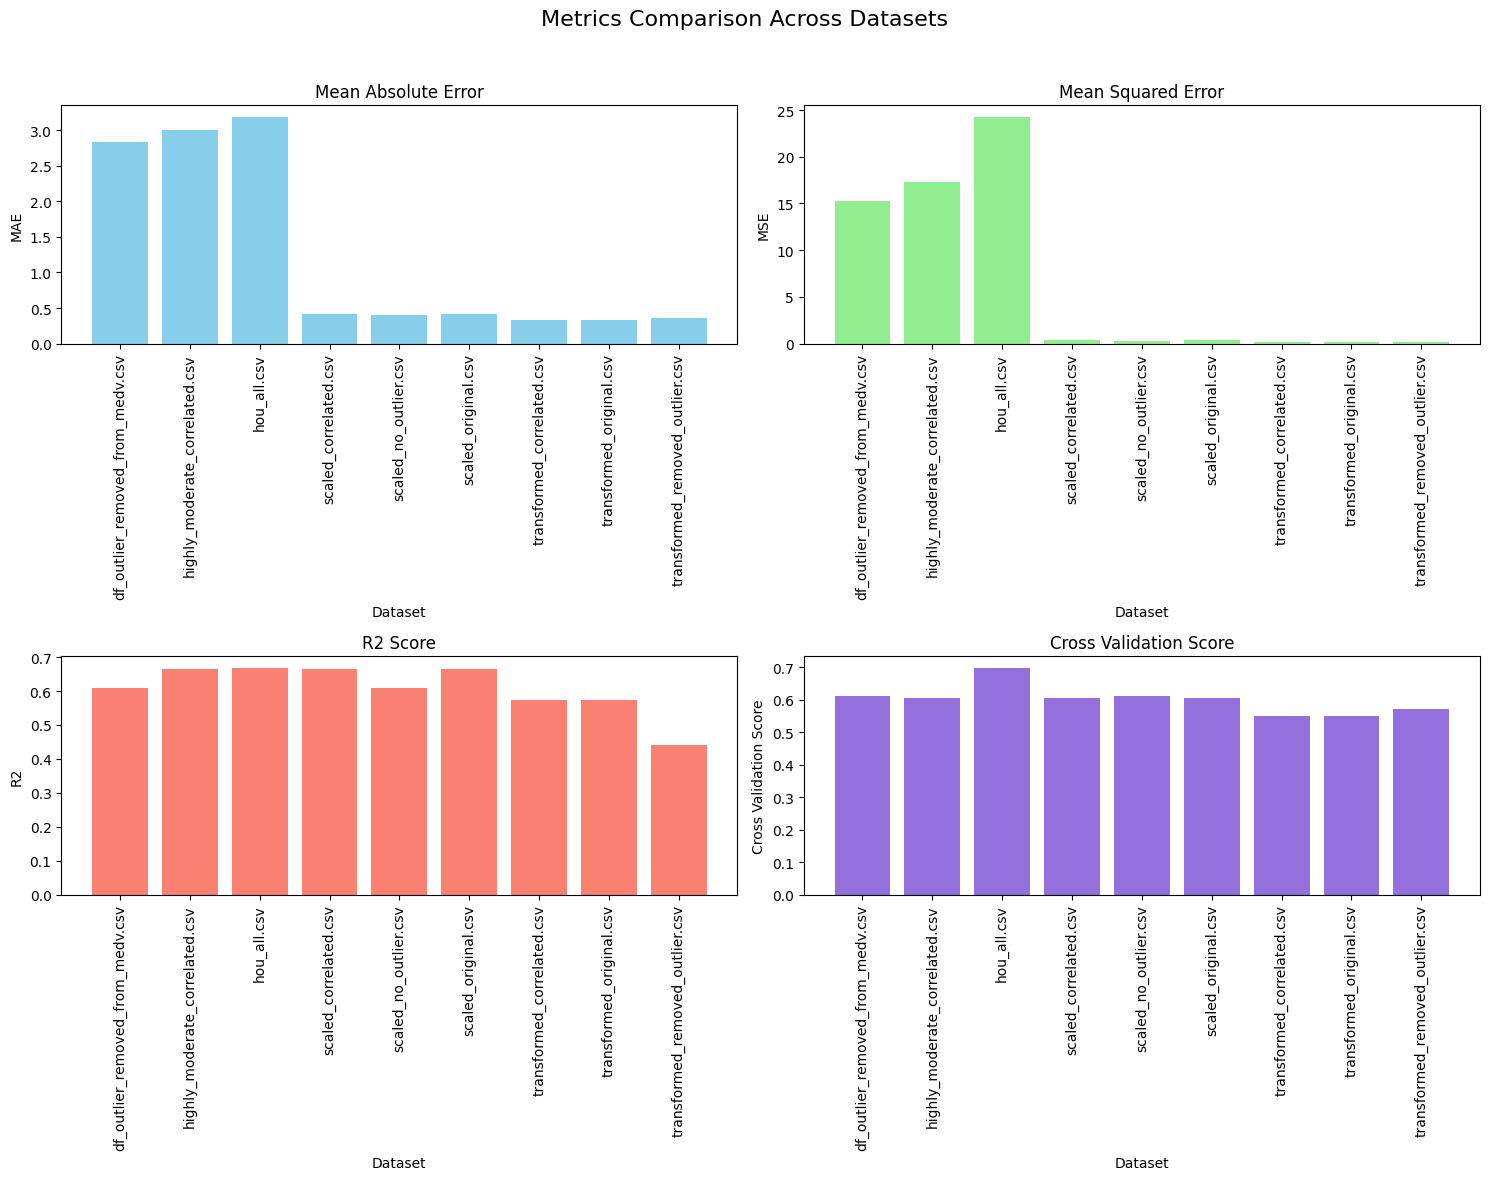

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for different metrics
colors_mae = 'skyblue'
colors_mse = 'lightgreen'
colors_r2 = 'salmon'
colors_cv = 'mediumpurple'

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Metrics Comparison Across Datasets', fontsize=16)

# Plot the MAE scores
axes[0, 0].bar(results_df['file'], results_df['MAE'], color=colors_mae)
axes[0, 0].set_title('Mean Absolute Error')
axes[0, 0].set_xlabel('Dataset')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot the MSE scores
axes[0, 1].bar(results_df['file'], results_df['MSE'], color=colors_mse)
axes[0, 1].set_title('Mean Squared Error')
axes[0, 1].set_xlabel('Dataset')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot the R2 scores
axes[1, 0].bar(results_df['file'], results_df['R2'], color=colors_r2)
axes[1, 0].set_title('R2 Score')
axes[1, 0].set_xlabel('Dataset')
axes[1, 0].set_ylabel('R2')
axes[1, 0].tick_params(axis='x', rotation=90)

# Ensure 'cross_val_score' column exists in the DataFrame
if 'cross_val_score' in results_df.columns:
    # Plot the Cross Validation scores
    axes[1, 1].bar(results_df['file'], results_df['cross_val_score'], color=colors_cv)
    axes[1, 1].set_title('Cross Validation Score')
    axes[1, 1].set_xlabel('Dataset')
    axes[1, 1].set_ylabel('Cross Validation Score')
    axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Calculating which dataset gives best results

#### Mean Absolute Error (MAE)
The datasets `scaled_no_outlier.csv`, `scaled_correlated.csv`, `scaled_original.csv`, `transformed_correlated.csv`, and `transformed_original.csv` show very low MAE values, indicating good model performance. Conversely, `df_outlier_removed_from_medv.csv`, `highly_moderate_correlated.csv`, and `hou_all.csv` have higher MAE values, indicating poorer performance.

#### Mean Squared Error (MSE)
Similar to the MAE, the datasets `scaled_no_outlier.csv`, `scaled_correlated.csv`, `scaled_original.csv`, `transformed_correlated.csv`, and `transformed_original.csv` show very low MSE values. The datasets `df_outlier_removed_from_medv.csv`, `highly_moderate_correlated.csv`, and `hou_all.csv` have higher MSE values.

#### R2 Score
Most datasets show R2 values between 0.6 and 0.7, indicating a moderate to good fit. The datasets `transformed_correlated.csv`, `transformed_original.csv`, and `transformed_removed_outlier.csv` have slightly lower R2 values, around 0.55, indicating a moderate fit.

#### Cross Validation Score
Most datasets have cross-validation scores between 0.6 and 0.7, indicating good generalization. The datasets `transformed_correlated.csv`, `transformed_original.csv`, and `transformed_removed_outlier.csv` have slightly lower scores around 0.55, suggesting moderate generalization.

#### Summary
- **Best Performing Datasets**: `scaled_no_outlier.csv`, `scaled_correlated.csv`, `scaled_original.csv`, `transformed_correlated.csv`, and `transformed_original.csv` show the lowest error values (both MAE and MSE).
- **Generalization**: `hou_all.csv` has the highest cross-validation score, suggesting it generalizes better than the others.

Overall, the scaled datasets (without outliers and transformed versions) tend to perform better across all metrics compared to other datasets.

## Sorting

In [32]:
sorted_df = results_df.sort_values(by=['MAE', 'MSE', 'R2','cross_val_score'], ascending=[True, True, False,False])

In [33]:
sorted_df

,file,MAE,MSE,R2,cross_val_score
6,transformed_correlated.csv,0.332631,0.165751,0.574287,0.551333
7,transformed_original.csv,0.332631,0.165751,0.574287,0.551333
8,transformed_removed_outlier.csv,0.361536,0.208581,0.440209,0.571245
4,scaled_no_outlier.csv,0.406712,0.313948,0.608800,0.612445
3,scaled_correlated.csv,0.421641,0.340568,0.664060,0.605730
5,scaled_original.csv,0.421641,0.340568,0.664060,0.605730
0,df_outlier_removed_from_medv.csv,2.831614,15.252727,0.608994,0.612255
1,highly_moderate_correlated.csv,3.007514,17.327400,0.664060,0.605730
2,hou_all.csv,3.189092,24.291119,0.668759,0.698664


- Lets take transformed_correlated.csv for further analysis
- the file contains columns that are highly and moderately correlated with the target

# transformed_correlated.csv analysis

## performance of different regression models (e.g., Linear Regression, Ridge, Lasso) on the dataset 
1. Normal way
2. Using GridSearch CV

In [67]:
# Load dataset
df = pd.read_csv(file_path, header=None)
    
    # Add column names
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'BIAS_COL']
df.columns = col_names

     # Remove non-numeric columns and handle potential issues with headers
df = df.apply(pd.to_numeric, errors='coerce').dropna()
    
    # Remove the last column
df = df.iloc[:, :-1]

    # Replace infinite values with NaN and then drop them
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
    
    # Split the data into features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']
    
    # Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#====================================================NORMAL WAY ===========================================================================

mae = []
mse = []
r2 = []
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
r2.append(r2_score(y_test, lr_pred))
mae.append(mean_absolute_error(y_test, lr_pred))
mse.append(mean_squared_error(y_test, lr_pred))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
r2.append(r2_score(y_test, ridge_pred))
mae.append(mean_absolute_error(y_test, ridge_pred))
mse.append(mean_squared_error(y_test, ridge_pred))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
r2.append(r2_score(y_test, lasso_pred))
mae.append(mean_absolute_error(y_test, ridge_pred))
mse.append(mean_squared_error(y_test, ridge_pred))

df_metrics = pd.DataFrame({'MAE':mae, 'MSE':mse,'R2':r2}, index=['linear','Ridge','Lasso']) 


# =======================================================GRID SEARCH CV=====================================================
# Define parameter grids
param_grid_lr = {}
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}

# Initialize models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# Grid Search CV for Linear Regression (no hyperparameters to tune)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='r2')
grid_search_lr.fit(X_train, y_train)

# Grid Search CV for Ridge Regression
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)

# Grid Search CV for Lasso Regression
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(X_train, y_train)

# Get the best models
best_lr = grid_search_lr.best_estimator_
best_ridge = grid_search_ridge.best_estimator_
best_lasso = grid_search_lasso.best_estimator_

# Initialize lists to store metrics
mae_grid = []
mse_grid = []
r2_grid = []

# Linear Regression
lr_pred_grid = best_lr.predict(X_test)
r2_grid.append(r2_score(y_test, lr_pred_grid))
mae_grid.append(mean_absolute_error(y_test, lr_pred_grid))
mse_grid.append(mean_squared_error(y_test, lr_pred_grid))

# Ridge Regression
ridge_pred_grid= best_ridge.predict(X_test)
r2_grid.append(r2_score(y_test, ridge_pred_grid))
mae_grid.append(mean_absolute_error(y_test, ridge_pred_grid))
mse_grid.append(mean_squared_error(y_test, ridge_pred_grid))

# Lasso Regression
lasso_pred_grid= best_lasso.predict(X_test)
r2_grid.append(r2_score(y_test, lasso_pred_grid))
mae_grid.append(mean_absolute_error(y_test, lasso_pred_grid))
mse_grid.append(mean_squared_error(y_test, lasso_pred_grid))

# Create DataFrame for metrics
df_metrics_grid= pd.DataFrame({'MAE':mae_grid, 'MSE':mse_grid, 'R2':r2_grid}, index=['Linear', 'Ridge', 'Lasso'])






## Normal Analysis

In [56]:
df_metrics

,MAE,MSE,R2
linear,0.361536,0.208581,0.440209
Ridge,0.351583,0.194046,0.479217
Lasso,0.351583,0.194046,0.683667



- **Best Performing Model Overall**: The Lasso model performs the best overall with the lowest MAE and MSE, and the highest R2 value. This indicates that the Lasso model provides the most accurate predictions and explains the most variance.
- **Ridge Model**: Performs better than the Linear model in all metrics but is outperformed by the Lasso model.
- **Linear Model**: Has the highest MAE and MSE, and the lowest R2 value among the three, indicating it is the least effective model for this data.

In conclusion, the Lasso model is the best choice among the three for minimizing errors and maximizing the explained variance in the predictions.

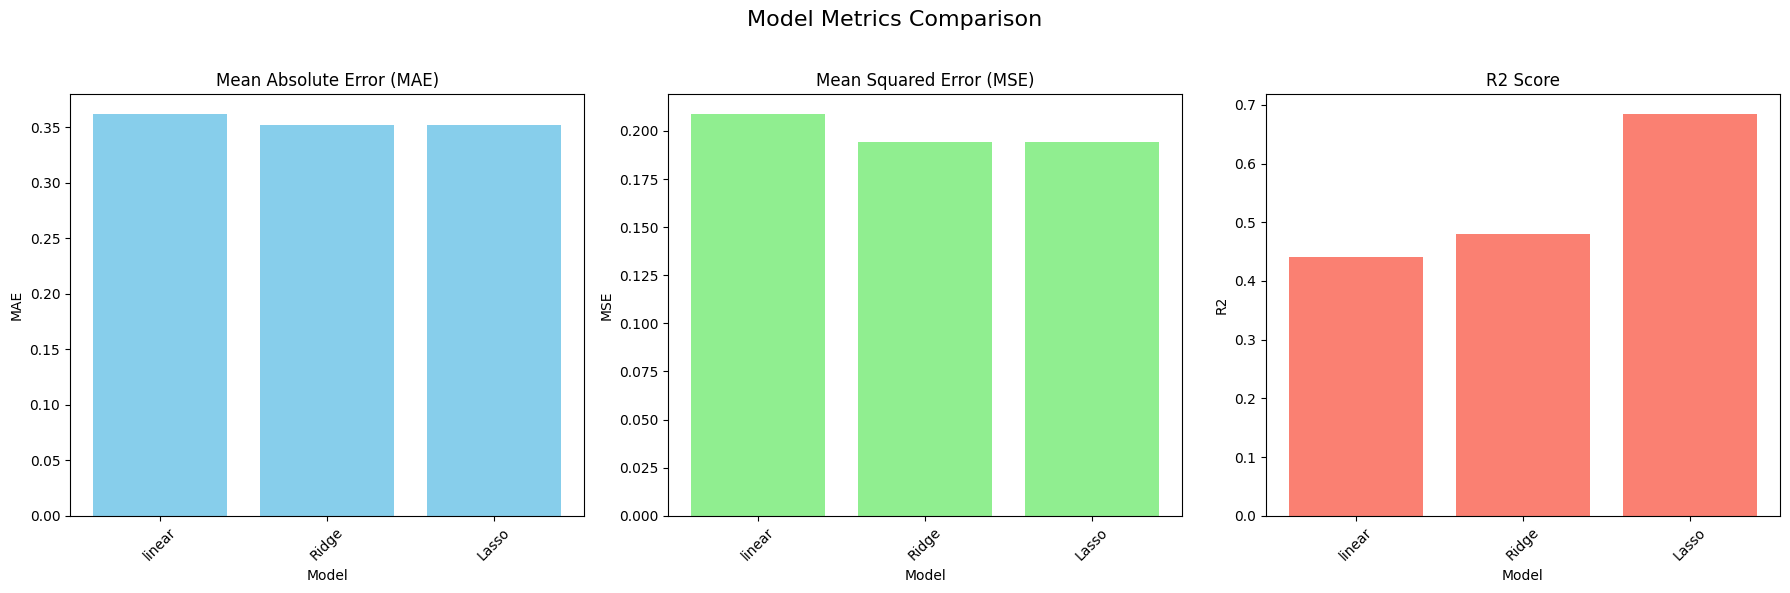

In [61]:

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Model Metrics Comparison', fontsize=16)

# Plot the MAE scores
axes[0].bar(df_metrics.index, df_metrics['MAE'], color='skyblue')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# Plot the MSE scores
axes[1].bar(df_metrics.index, df_metrics['MSE'], color='lightgreen')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x', rotation=45)

# Plot the R2 scores
axes[2].bar(df_metrics.index, df_metrics['R2'], color='salmon')
axes[2].set_title('R2 Score')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R2')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


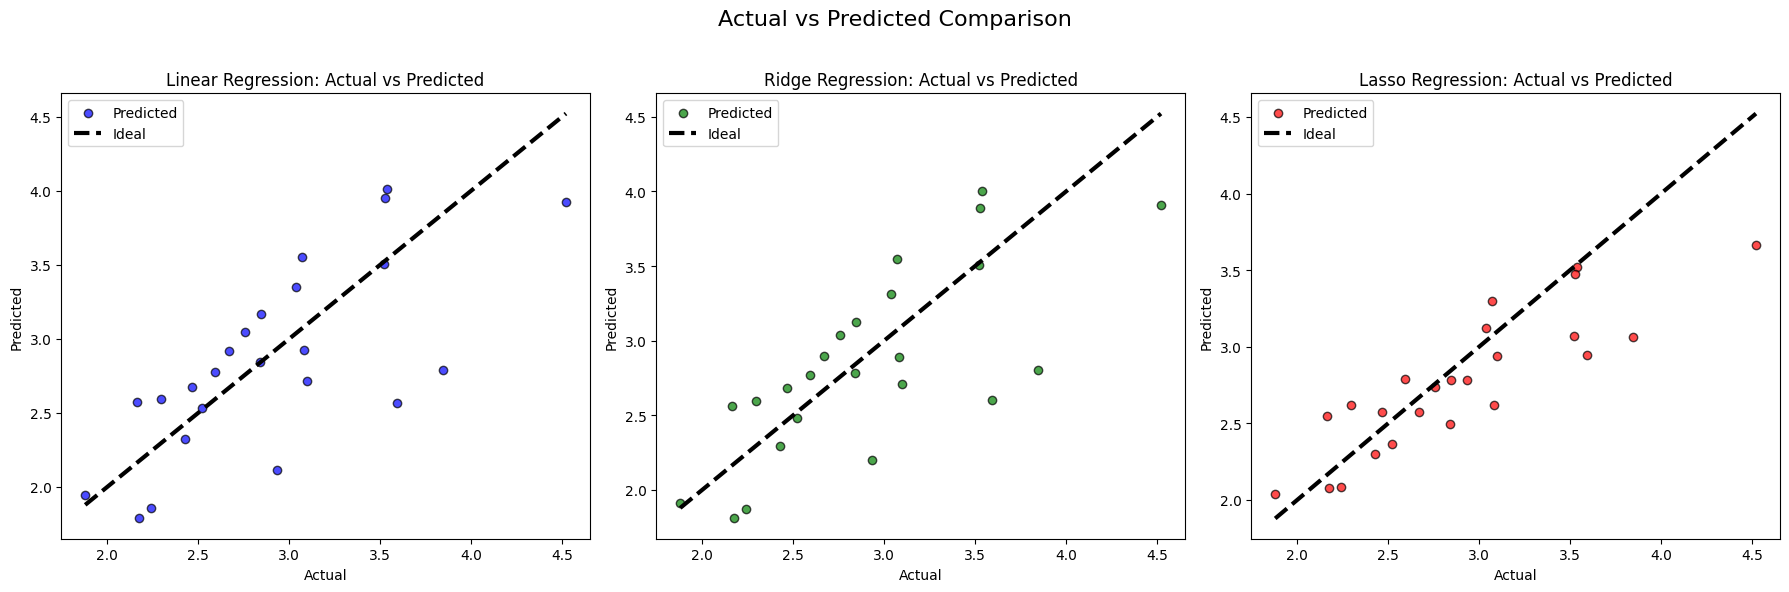

In [58]:
# Create subplots for Actual vs Predicted in the same figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Actual vs Predicted Comparison', fontsize=16)

# Linear Regression
axes[0].scatter(y_test, lr_pred, color='blue', edgecolors='k', alpha=0.7, label='Predicted')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Linear Regression: Actual vs Predicted')
axes[0].legend()

# Ridge Regression
axes[1].scatter(y_test, ridge_pred, color='green', edgecolors='k', alpha=0.7, label='Predicted')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Ridge Regression: Actual vs Predicted')
axes[1].legend()

# Lasso Regression
axes[2].scatter(y_test, lasso_pred, color='red', edgecolors='k', alpha=0.7, label='Predicted')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
axes[2].set_xlabel('Actual')
axes[2].set_ylabel('Predicted')
axes[2].set_title('Lasso Regression: Actual vs Predicted')
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Grid Search CV Analysis

In [59]:
df_metrics_grid

,MAE,MSE,R2
Linear,0.361536,0.208581,0.440209
Ridge,0.351583,0.194046,0.479217
Lasso,0.254769,0.117867,0.683667


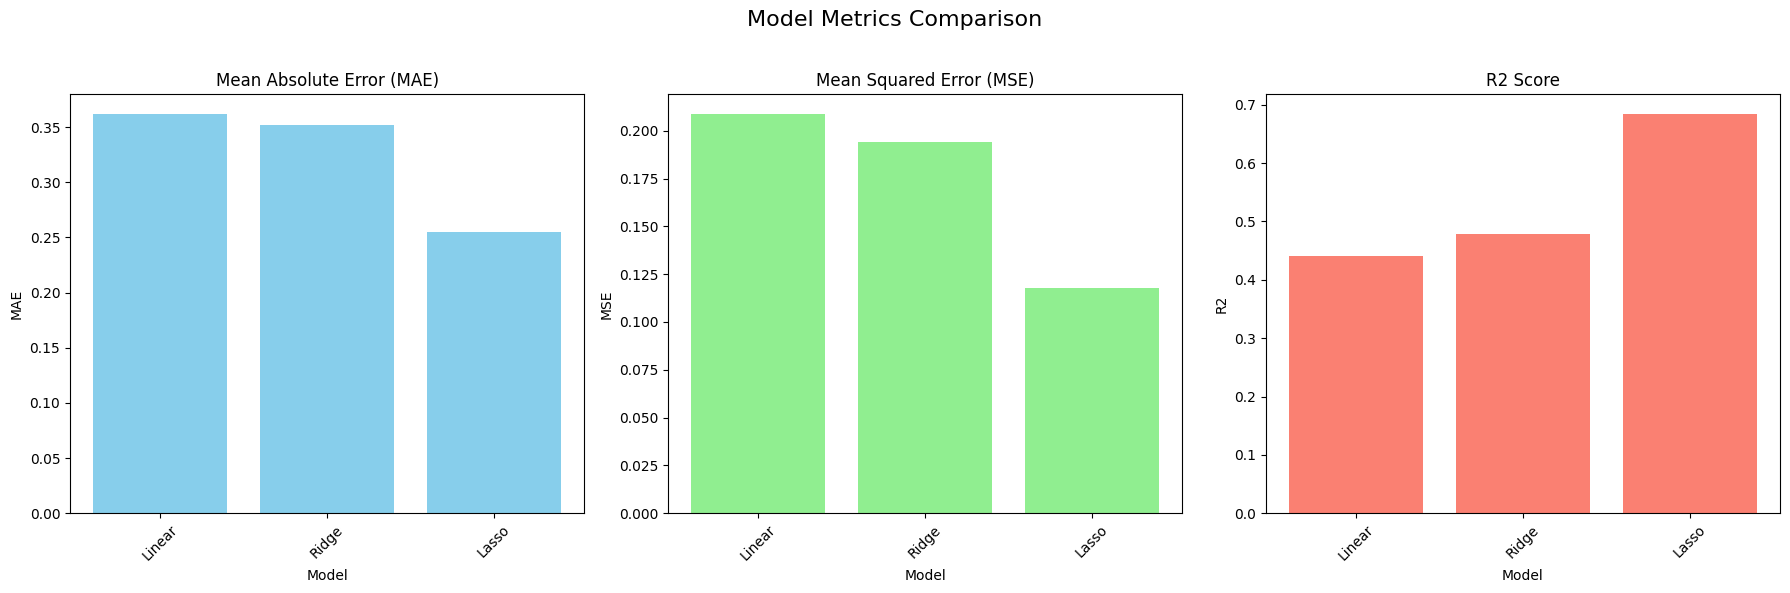

In [62]:

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Model Metrics Comparison', fontsize=16)

# Plot the MAE scores
axes[0].bar(df_metrics_grid.index, df_metrics_grid['MAE'], color='skyblue')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# Plot the MSE scores
axes[1].bar(df_metrics_grid.index, df_metrics_grid['MSE'], color='lightgreen')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x', rotation=45)

# Plot the R2 scores
axes[2].bar(df_metrics_grid.index, df_metrics_grid['R2'], color='salmon')
axes[2].set_title('R2 Score')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R2')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


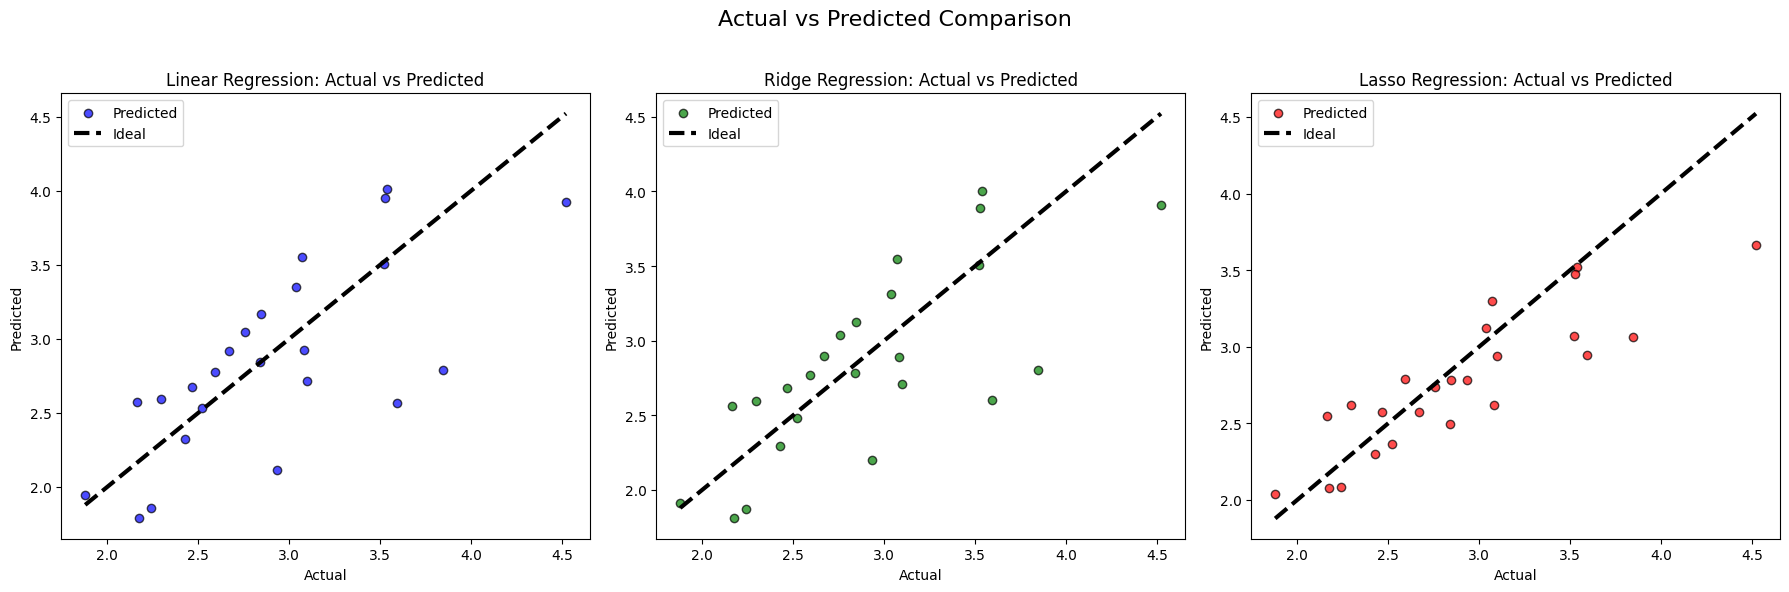

In [63]:
# Create subplots for Actual vs Predicted in the same figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Actual vs Predicted Comparison', fontsize=16)

# Linear Regression
axes[0].scatter(y_test, lr_pred_grid, color='blue', edgecolors='k', alpha=0.7, label='Predicted')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Linear Regression: Actual vs Predicted')
axes[0].legend()

# Ridge Regression
axes[1].scatter(y_test, ridge_pred_grid, color='green', edgecolors='k', alpha=0.7, label='Predicted')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Ridge Regression: Actual vs Predicted')
axes[1].legend()

# Lasso Regression
axes[2].scatter(y_test, lasso_pred_grid, color='red', edgecolors='k', alpha=0.7, label='Predicted')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal')
axes[2].set_xlabel('Actual')
axes[2].set_ylabel('Predicted')
axes[2].set_title('Lasso Regression: Actual vs Predicted')
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



- **dots**: Represent the predicted values.
- **Dashed line**: Represents the ideal line where actual equals 

- **Linear Regression**: Shows the largest spread and more significant deviations from the ideal line, indicating higher prediction errors.
- **Ridge Regression**: Performs better than Linear Regression, with predicted values closer to the ideal line and fewer large deviations.
- **Lasso Regression**: Outperforms both Linear and Ridge Regression, with predicted values most closely aligned with the actual values, indicating the lowest prediction errors.

The visual representation aligns with the earlier numerical metrics, confirming that Lasso Regression is the best-performing model among the three in terms of accuracy and fit.

## comparing results from Normal And GridSearchCV 

In [64]:
df_metrics

,MAE,MSE,R2
linear,0.361536,0.208581,0.440209
Ridge,0.351583,0.194046,0.479217
Lasso,0.351583,0.194046,0.683667


In [65]:
df_metrics_grid

,MAE,MSE,R2
Linear,0.361536,0.208581,0.440209
Ridge,0.351583,0.194046,0.479217
Lasso,0.254769,0.117867,0.683667


-comparing normal way of prediction and grid search cv , there is only difference in terms of lasso that gives best using GridSearchCV.